# Edge Detection

## Learning Outcomes
This example identifies edges in an image using Sobol edge detection algorithm and is implemented using NumPy and SciPy. An edge is defined as an abrupt change in intensity of the image. The Sobol edge detection algorithm uses a kernel in each direction to compute derivative of intensity of the image. The gradient of the intensity will help us determine the locations where changes in intensity are abrupt, which can then be used to detect edges in an image.

This example uses the following packages in addition to NumPy/cuNumeric: Scipy, Matplotlib, PIL

## Background
For more information on edge detection, check this [material](https://www.cs.auckland.ac.nz/compsci373s1c/PatricesLectures/Edge%20detection-Sobel_2up.pdf).

## Implementation

In [ ]:
import numpy as np
from numpy import ndarray
from scipy import ndimage
from scipy.signal import convolve
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
# Intensity varies between 0 and 255 in the image.
intensity_min = 0.0
intensity_max = 255.0

Since NumPy's `convolve` API does not allow two-dimensional arrays and our image is represented in an two-dimensional array, we will use the `convolve` API from SciPy for this example. cuNumeric's implementation of `convolve` permits two-dimensional array and will be used if `cuNumeric` is imported instead of `NumPy`. Try changing the import statement from "import numpy as np" to "import cunumeric as np"!

In [3]:
def convolve_nd(array: ndarray, kernel: ndarray, mode: str = "same"):
    """
    array: ndarray
        Input array corresponding to a grayscale image
    kernel: ndarray
        Kernel to compute the gradient in x or y as per Sobel Edge Detector
    mode: str
        The default convolution mode. Note that cuNumeric only
        supports the convolution mode "same".

    Notes:
        Check https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm
        for more information on Sobel Edge Detector

        The image was taken from:
        https://docs.nvidia.com/vpi/algo_canny_edge_detector.html
    """
    if np.__name__ == "cunumeric":
        return np.convolve(array, kernel, mode)
    return convolve(array, kernel, mode)

Read the image and compute the gradient by performing a convolution operation

In [4]:
# Read the image
image = np.array(Image.open("image.png"))

# Sobol kernels in x and y to compute the derivatives
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Apply the Sobel kernels and compute the gradient
grad_x = convolve_nd(image, kernel_x, mode="same")
grad_y = convolve_nd(image, kernel_y, mode="same")

# Normalize the gradients and scale to the max intensity, which defines the edge
edges = np.sqrt(grad_x**2 + grad_y**2)
edges *= intensity_max / np.max(edges)
edges = edges.astype(int)

Now that we have computed the gradient and the edges, we can plot the edges and see if they actually pick up the edges in the original image.

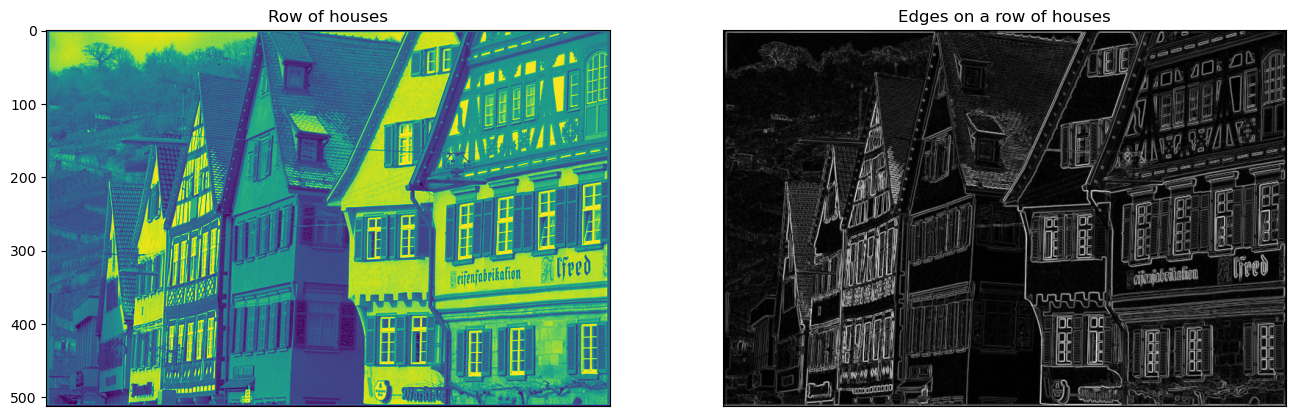

In [5]:
fig, axes = plt.subplots(1,2,figsize=(16,9))

axes[0].imshow(image)
axes[0].set_title("Row of houses")
axes[0].set_xticks([]), axes[1].set_yticks([]);

axes[1].imshow(edges, cmap="gray")
axes[1].set_title("Edges on a row of houses")
axes[1].set_xticks([]), axes[1].set_yticks([]);